In [3]:
import melanoma as mel

%matplotlib inline
%load_ext autoreload
%autoreload -p 2

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.debug("test")

rootpath = '/hpcstor6/scratch01/s/sanghyuk.kim001'
img_size = (224, 224) # height, width
utilInstance = mel.Util(rootpath, img_size)
dataType = mel.DatasetType.ISIC2017


CREATE_DB = 1
# Save datasets as pickle files
if (CREATE_DB == 1):
    utilInstance.saveDatasetsToFile(dataType, 1.2)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
path:  /hpcstor6/scratch01/s/sanghyuk.kim001
seed value:  1
color_mode:  rgb


DEBUG:Melanoma classification:Images available in ISIC2017 train dataset: 2000
DEBUG:Melanoma classification:Images available in ISIC2017 validation dataset: 150
DEBUG:Melanoma classification:Images available in ISIC2017 test dataset: 600
DEBUG:Melanoma classification:Let's check ISIC2017 metadata briefly
DEBUG:Melanoma classification:This is ISIC2017 training data samples


,image_id,melanoma,seborrheic_keratosis
0,ISIC_0000000,0.0,0.0
1,ISIC_0000001,0.0,0.0
2,ISIC_0000002,1.0,0.0
3,ISIC_0000003,0.0,0.0
4,ISIC_0000004,1.0,0.0


DEBUG:Melanoma classification:This is ISIC2017 test data samples


,image_id,melanoma,seborrheic_keratosis
0,ISIC_0012086,0.0,1.0
1,ISIC_0012092,0.0,0.0
2,ISIC_0012095,0.0,0.0
3,ISIC_0012134,0.0,1.0
4,ISIC_0012136,0.0,1.0


DEBUG:Melanoma classification:Check null data in ISIC2017 training metadata


image_id                 0
melanoma                 0
seborrheic_keratosis     0
path                     0
cell_type_binary         0
cell_type_task3_1        0
cell_type_task3_2        0
cell_type_binary_idx     0
cell_type_task3_1_idx    0
cell_type_task3_2_idx    0
dtype: int64

DEBUG:Melanoma classification:Check null data in ISIC2017 validation metadata


image_id                 0
melanoma                 0
seborrheic_keratosis     0
path                     0
cell_type_binary         0
cell_type_task3_1        0
cell_type_task3_2        0
cell_type_binary_idx     0
cell_type_task3_1_idx    0
cell_type_task3_2_idx    0
dtype: int64

DEBUG:Melanoma classification:Check null data in ISIC2017 test metadata


image_id                 0
melanoma                 0
seborrheic_keratosis     0
path                     0
cell_type_binary         0
cell_type_task3_1        0
cell_type_task3_2        0
cell_type_binary_idx     0
cell_type_task3_1_idx    0
cell_type_task3_2_idx    0
dtype: int64

In [11]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.python.keras.callbacks import EarlyStopping

img_height, img_width = utilInstance.getImgSize()

optimizer1 = Adam(lr=0.001)
optimizer2 = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6, amsgrad=False)
red_lr= ReduceLROnPlateau(monitor='val_accuracy', patience=3 , verbose=1, factor=0.7)
cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = 20)

CFG = dict(
			batch_size            =  64,   # 8; 16; 32; 64; bigger batch size => moemry allocation issue
			epochs                =  100,   # 5; 10; 20;
			last_trainable_layers =   0,
			verbose               =   1,   # 0; 1
			fontsize              =  14,
			num_classes           =  2, # binary

			# Images sizes
			img_height = img_height,   # Original: (450h, 600w)
            img_width = img_width,

			# Images augs
			ROTATION_RANGE        =   90.0,
			ZOOM_RANGE            =   0.1,
			HSHIFT_RANGE          =   0.1, # randomly shift images horizontally
			WSHIFT_RANGE          =   0.1, # randomly shift images vertically
			HFLIP                 = False, # randomly flip images
			VFLIP                 = False, # randomly flip images

			# Model settings
			pretrained_weights = 'imagenet',
			model_optimizer = optimizer2,
			loss='binary_crossentropy',
			metrics=['accuracy'],
			callbacks = [],

			# Postprocessing
			stopper_patience      =  0,   # 0.01; 0.05; 0.1; 0.2;
			# run_functions_eagerly = False,
            
            # save
            snapshot_path = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot'
		)

/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)              

2023-12-28 22:21:51.062735: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-12-28 22:21:51.064130: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245800000 Hz


Epoch 1/200


2023-12-28 22:21:56.190255: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-12-28 22:21:56.884514: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-12-28 22:21:57.605052: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-12-28 22:21:57.605076: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-12-28 22:21:57.605141: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-12-28 22:21:57.650931: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-12-28 22:21:58.395875: I tensorflow/stream_exec

  1/125 [..............................] - ETA: 16:47 - loss: 0.8616 - accuracy: 0.5000

2023-12-28 22:21:59.210760: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


125/125 [==============================] - 79s 568ms/step - loss: 0.7794 - accuracy: 0.5797 - val_loss: 0.4440 - val_accuracy: 0.8743


/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/200
125/125 [==============================] - 69s 546ms/step - loss: 0.6666 - accuracy: 0.6498 - val_loss: 0.3420 - val_accuracy: 0.9320
Epoch 3/200
125/125 [==============================] - 69s 545ms/step - loss: 0.6024 - accuracy: 0.6973 - val_loss: 0.2979 - val_accuracy: 0.9536
Epoch 4/200
125/125 [==============================] - 69s 546ms/step - loss: 0.5443 - accuracy: 0.7377 - val_loss: 0.2576 - val_accuracy: 0.9570
Epoch 5/200
125/125 [==============================] - 69s 545ms/step - loss: 0.4960 - accuracy: 0.7667 - val_loss: 0.2120 - val_accuracy: 0.9615
Epoch 6/200
125/125 [==============================] - 68s 541ms/step - loss: 0.4614 - accuracy: 0.7923 - val_loss: 0.2005 - val_accuracy: 0.9660
Epoch 7/200
125/125 [==============================] - 68s 542ms/step - loss: 0.4243 - accuracy: 0.8173 - val_loss: 0.1771 - val_accuracy: 0.9626
Epoch 8/200
125/125 [==============================] - 68s 544ms/step - loss: 0.4083 - accuracy: 0.8274 - val_loss: 0.1862 -

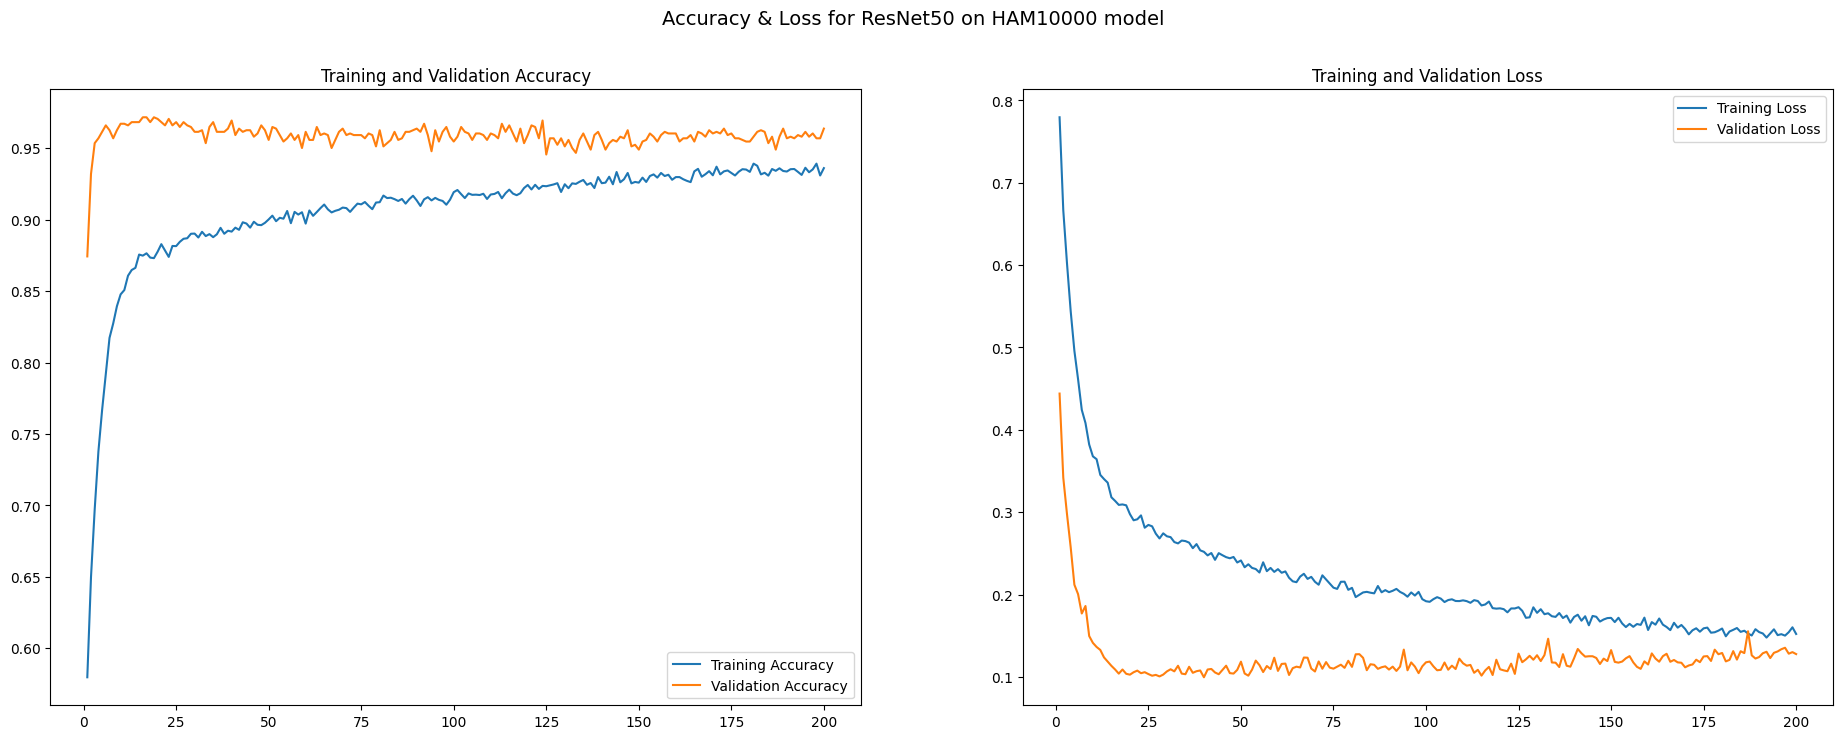

In [9]:
# Solely training HAM10000
dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'

trainimages_HAM10000, testimages_HAM10000, validationimages_HAM10000, \
			trainlabels_binary_HAM10000, testlabels_binary_HAM10000, validationlabels_binary_HAM10000, num_classes_binary_HAM10000\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'HAM10000_{img_size[0]}h_{img_size[1]}w_binary.pkl')


base_model = mel.CNN(CFG=CFG)
ResNet50_name = 'HAM10000 binary training on ResNet50'
model = base_model.myresnet50()

# Train HAM10000
history = base_model.fit_model(    
    model = model,
    model_name = 'ResNet50 on HAM10000',
    trainimages = trainimages_HAM10000,
    trainlabels = trainlabels_binary_HAM10000,
    validationimages = validationimages_HAM10000,
    validationlabels = validationlabels_binary_HAM10000,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = 'ResNet50 on HAM10000')

visualizer.visualize_performance(
    model_name = 'ResNet50 on HAM10000',
    history = history
)

2023-12-29 18:48:26.558837: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-12-29 18:48:26.759312: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:07:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-12-29 18:48:26.759351: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-12-29 18:48:26.763716: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-12-29 18:48:26.763757: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2023-12-29 18:48:26.764885: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcufft.so.10
2

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

2023-12-29 18:48:28.932523: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-12-29 18:48:28.952804: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245800000 Hz
2023-12-29 18:48:31.054980: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-12-29 18:48:31.759102: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-12-29 18:48:32.508754: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-12-29 18:48:32.508775: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-12-29 18:48:32.508843: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modif

  3/185 [..............................] - ETA: 12s - loss: 0.8877 - accuracy: 0.5156 

2023-12-29 18:48:34.077908: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


185/185 [==============================] - 20s 83ms/step - loss: 0.6383 - accuracy: 0.6840 - val_loss: 0.2065 - val_accuracy: 0.9411


/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/100
185/185 [==============================] - 13s 69ms/step - loss: 0.5153 - accuracy: 0.7645 - val_loss: 0.1815 - val_accuracy: 0.9536
Epoch 3/100
185/185 [==============================] - 13s 69ms/step - loss: 0.4668 - accuracy: 0.7934 - val_loss: 0.1576 - val_accuracy: 0.9581
Epoch 4/100
185/185 [==============================] - 13s 70ms/step - loss: 0.4307 - accuracy: 0.8120 - val_loss: 0.1371 - val_accuracy: 0.9604
Epoch 5/100
185/185 [==============================] - 13s 70ms/step - loss: 0.4064 - accuracy: 0.8242 - val_loss: 0.1355 - val_accuracy: 0.9570
Epoch 6/100
185/185 [==============================] - 13s 70ms/step - loss: 0.3940 - accuracy: 0.8322 - val_loss: 0.1265 - val_accuracy: 0.9649
Epoch 7/100
185/185 [==============================] - 13s 68ms/step - loss: 0.3858 - accuracy: 0.8360 - val_loss: 0.1295 - val_accuracy: 0.9638
Epoch 8/100
185/185 [==============================] - 13s 69ms/step - loss: 0.3658 - accuracy: 0.8408 - val_loss: 0.1155 - val_ac

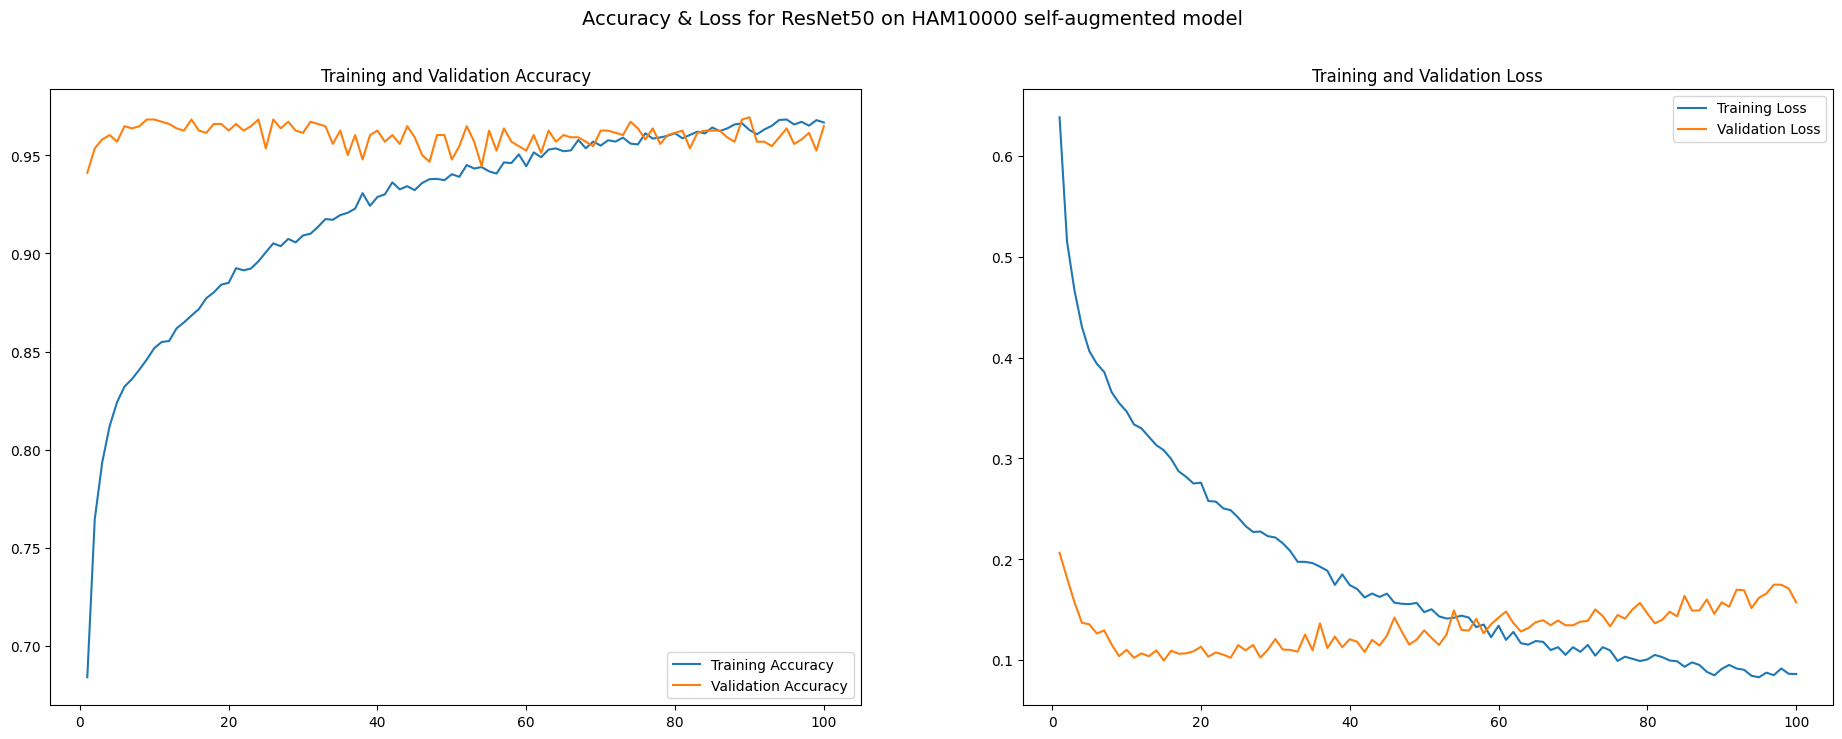

In [12]:
# Solely training HAM10000 augmented
del_augmentation = {'ROTATION_RANGE':0.0, 'ZOOM_RANGE':0.0, 'HSHIFT_RANGE':0.0, 'WSHIFT_RANGE':0.0}
CFG.update(del_augmentation)

dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'

trainimages_HAM10000_aug, testimages_HAM10000, validationimages_HAM10000, \
			trainlabels_binary_HAM10000_aug, testlabels_binary_HAM10000, validationlabels_binary_HAM10000, num_classes_binary_HAM10000\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'HAM10000_augmentedWith_2434Melanoma_1399Non-Melanoma_{img_size[0]}h_{img_size[1]}w_binary.pkl')
# HAM10000_augmentedWith_2434Melanoma_1399Non-Melanoma_224h_224w_binary.pkl

base_model = mel.CNN(CFG=CFG)
ResNet50_name = 'HAM10000 augmented binary training on ResNet50'
model = base_model.myresnet50()

model_name = 'ResNet50 on HAM10000 self-augmented'

# Train HAM10000
history = base_model.fit_model(    
    model = model,
    model_name = model_name,
    trainimages = trainimages_HAM10000_aug,
    trainlabels = trainlabels_binary_HAM10000_aug,
    validationimages = validationimages_HAM10000,
    validationlabels = validationlabels_binary_HAM10000,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = model_name)

visualizer.visualize_performance(
    model_name = model_name,
    history = history
)

In [14]:
# Testing HAM10000 augmented trained model

from keras.models import load_model
# modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/'
filename = 'ResNet50 on HAM10000 self-augmented.hdf5'
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename
dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'
# saved_model = load_model(modelpath)

# Test on HAM10000 test set
trainimages_HAM10000, testimages_HAM10000, validationimages_HAM10000, \
			trainlabels_binary_HAM10000, testlabels_binary_HAM10000, validationlabels_binary_HAM10000, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'HAM10000_{img_size[0]}h_{img_size[1]}w_binary.pkl')
test_model = mel.CNN(CFG=CFG)

print("Testing on HAM10000")
Resnet50_model, test_loss, ResNet50_test_acc = test_model.evaluate_model(
    model_name = 'HAM10000 augmented testing on HAM10000 trained with ResNet50',
    model_path = modelpath,
    trainimages = trainimages_HAM10000,
    trainlabels = trainlabels_binary_HAM10000,
    validationimages = validationimages_HAM10000,
    validationlabels = validationlabels_binary_HAM10000,
    testimages = testimages_HAM10000,
    testlabels = testlabels_binary_HAM10000
)


# Test on ISIC 2016 test set
trainimages_ISIC2016, testimages_ISIC2016, validationimages_ISIC2016, \
			trainlabels_binary_ISIC2016, testlabels_binary_ISIC2016, validationlabels_binary_ISIC2016, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl')



print("Testing on ISIC2016")
Resnet50_model, test_loss, ResNet50_test_acc = test_model.evaluate_model(
    model_name = 'HAM10000 augmented testing on ISIC2016 trained with ResNet50',
    model_path = modelpath,
    trainimages = trainimages_ISIC2016,
    trainlabels = trainlabels_binary_ISIC2016,
    validationimages = validationimages_ISIC2016,
    validationlabels = validationlabels_binary_ISIC2016,
    testimages = testimages_ISIC2016,
    testlabels = testlabels_binary_ISIC2016
)

# Test on ISIC 2017 test set
trainimages_ISIC2017, testimages_ISIC2017, validationimages_ISIC2017, \
			trainlabels_binary_ISIC2017, testlabels_binary_ISIC2017, validationlabels_binary_ISIC2017, num_classes_binary_ISIC2017\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl')

# Test on ISIC2017 test set
print("Testing on ISIC2017")
Resnet50_model, test_loss, ResNet50_test_acc = test_model.evaluate_model(
    model_name = 'HAM10000 augmented testing on ISIC2017 trained with ResNet50',
    model_path = modelpath,
    trainimages = trainimages_ISIC2017,
    trainlabels = trainlabels_binary_ISIC2017,
    validationimages = validationimages_ISIC2017,
    validationlabels = validationlabels_binary_ISIC2017,
    testimages = testimages_ISIC2017,
    testlabels = testlabels_binary_ISIC2017
)


Testing on HAM10000
Evaluating HAM10000 augmented testing on HAM10000 trained with ResNet50 model...

251/251 [==============================] - 6s 22ms/step - loss: 0.1971 - accuracy: 0.9168
Train loss = 0.19710761308670044  ;  Train accuracy = 91.68%

28/28 [==============================] - 1s 21ms/step - loss: 0.0997 - accuracy: 0.9683
Validation loss = 0.09966643899679184  ;  Validation accuracy = 96.83%

35/35 [==============================] - 1s 21ms/step - loss: 0.1105 - accuracy: 0.9556
Test loss = 0.11052345484495163  ;  Test accuracy = 95.56%
Testing on ISIC2016
Evaluating HAM10000 augmented testing on ISIC2016 trained with ResNet50 model...

23/23 [==============================] - 1s 22ms/step - loss: 0.5773 - accuracy: 0.8139
Train loss = 0.5772544145584106  ;  Train accuracy = 81.39%

6/6 [==============================] - 0s 20ms/step - loss: 0.4789 - accuracy: 0.8333
Validation loss = 0.47892722487449646  ;  Validation accuracy = 83.33%

12/12 [=======================

In [15]:
# Testing HAM10000 augmented trained model

from keras.models import load_model
# modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/'
filename = 'ResNet50 on Kaggle DB.hdf5'
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename
dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'
# saved_model = load_model(modelpath)

model_name = 'Kaggle testing on HAM10000 trained with ResNet50'

# Test on HAM10000 test set
trainimages_HAM10000, testimages_HAM10000, validationimages_HAM10000, \
			trainlabels_binary_HAM10000, testlabels_binary_HAM10000, validationlabels_binary_HAM10000, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'HAM10000_{img_size[0]}h_{img_size[1]}w_binary.pkl')
test_model = mel.CNN(CFG=CFG)

print("Testing on HAM10000")
Resnet50_model, test_loss, ResNet50_test_acc = test_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_HAM10000,
    trainlabels = trainlabels_binary_HAM10000,
    validationimages = validationimages_HAM10000,
    validationlabels = validationlabels_binary_HAM10000,
    testimages = testimages_HAM10000,
    testlabels = testlabels_binary_HAM10000
)


# Test on ISIC 2016 test set
trainimages_ISIC2016, testimages_ISIC2016, validationimages_ISIC2016, \
			trainlabels_binary_ISIC2016, testlabels_binary_ISIC2016, validationlabels_binary_ISIC2016, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl')



print("Testing on ISIC2016")
Resnet50_model, test_loss, ResNet50_test_acc = test_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_ISIC2016,
    trainlabels = trainlabels_binary_ISIC2016,
    validationimages = validationimages_ISIC2016,
    validationlabels = validationlabels_binary_ISIC2016,
    testimages = testimages_ISIC2016,
    testlabels = testlabels_binary_ISIC2016
)

# Test on ISIC 2017 test set
trainimages_ISIC2017, testimages_ISIC2017, validationimages_ISIC2017, \
			trainlabels_binary_ISIC2017, testlabels_binary_ISIC2017, validationlabels_binary_ISIC2017, num_classes_binary_ISIC2017\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl')

# Test on ISIC2017 test set
print("Testing on ISIC2017")
Resnet50_model, test_loss, ResNet50_test_acc = test_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_ISIC2017,
    trainlabels = trainlabels_binary_ISIC2017,
    validationimages = validationimages_ISIC2017,
    validationlabels = validationlabels_binary_ISIC2017,
    testimages = testimages_ISIC2017,
    testlabels = testlabels_binary_ISIC2017
)


Testing on HAM10000
Evaluating Kaggle testing on HAM10000 trained with ResNet50 model...

251/251 [==============================] - 6s 22ms/step - loss: 0.6273 - accuracy: 0.7367
Train loss = 0.6273460984230042  ;  Train accuracy = 73.67%

28/28 [==============================] - 1s 21ms/step - loss: 0.3395 - accuracy: 0.8596
Validation loss = 0.3395203948020935  ;  Validation accuracy = 85.96%

35/35 [==============================] - 1s 21ms/step - loss: 0.3484 - accuracy: 0.8676
Test loss = 0.3484240472316742  ;  Test accuracy = 86.76%
Testing on ISIC2016
Evaluating Kaggle testing on HAM10000 trained with ResNet50 model...

23/23 [==============================] - 1s 22ms/step - loss: 0.8488 - accuracy: 0.5681
Train loss = 0.8488056659698486  ;  Train accuracy = 56.81%

6/6 [==============================] - 0s 20ms/step - loss: 0.9357 - accuracy: 0.5389
Validation loss = 0.9357025027275085  ;  Validation accuracy = 53.89%

12/12 [==============================] - 0s 21ms/step - lo

In [16]:
# Testing HAM10000 augmented trained model

from keras.models import load_model
# modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/'
filename = 'ResNet50 on Kaggle DB with optimizer2.hdf5'
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename
dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'
# saved_model = load_model(modelpath)

model_name = 'Kaggle testing on HAM10000 trained with ResNet50 optimizer2'

# Test on HAM10000 test set
trainimages_HAM10000, testimages_HAM10000, validationimages_HAM10000, \
			trainlabels_binary_HAM10000, testlabels_binary_HAM10000, validationlabels_binary_HAM10000, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'HAM10000_{img_size[0]}h_{img_size[1]}w_binary.pkl')
test_model = mel.CNN(CFG=CFG)

print("Testing on HAM10000")
Resnet50_model, test_loss, ResNet50_test_acc = test_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_HAM10000,
    trainlabels = trainlabels_binary_HAM10000,
    validationimages = validationimages_HAM10000,
    validationlabels = validationlabels_binary_HAM10000,
    testimages = testimages_HAM10000,
    testlabels = testlabels_binary_HAM10000
)


# Test on ISIC 2016 test set
trainimages_ISIC2016, testimages_ISIC2016, validationimages_ISIC2016, \
			trainlabels_binary_ISIC2016, testlabels_binary_ISIC2016, validationlabels_binary_ISIC2016, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl')



print("Testing on ISIC2016")
Resnet50_model, test_loss, ResNet50_test_acc = test_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_ISIC2016,
    trainlabels = trainlabels_binary_ISIC2016,
    validationimages = validationimages_ISIC2016,
    validationlabels = validationlabels_binary_ISIC2016,
    testimages = testimages_ISIC2016,
    testlabels = testlabels_binary_ISIC2016
)

# Test on ISIC 2017 test set
trainimages_ISIC2017, testimages_ISIC2017, validationimages_ISIC2017, \
			trainlabels_binary_ISIC2017, testlabels_binary_ISIC2017, validationlabels_binary_ISIC2017, num_classes_binary_ISIC2017\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl')

# Test on ISIC2017 test set
print("Testing on ISIC2017")
Resnet50_model, test_loss, ResNet50_test_acc = test_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_ISIC2017,
    trainlabels = trainlabels_binary_ISIC2017,
    validationimages = validationimages_ISIC2017,
    validationlabels = validationlabels_binary_ISIC2017,
    testimages = testimages_ISIC2017,
    testlabels = testlabels_binary_ISIC2017
)


Testing on HAM10000
Evaluating Kaggle testing on HAM10000 trained with ResNet50 optimizer2 model...

251/251 [==============================] - 6s 22ms/step - loss: 0.7485 - accuracy: 0.6959
Train loss = 0.7484596371650696  ;  Train accuracy = 69.59%

28/28 [==============================] - 1s 21ms/step - loss: 0.4099 - accuracy: 0.8369
Validation loss = 0.4098653197288513  ;  Validation accuracy = 83.69%

35/35 [==============================] - 1s 21ms/step - loss: 0.4210 - accuracy: 0.8477
Test loss = 0.42104795575141907  ;  Test accuracy = 84.77%
Testing on ISIC2016
Evaluating Kaggle testing on HAM10000 trained with ResNet50 optimizer2 model...

23/23 [==============================] - 1s 22ms/step - loss: 1.0424 - accuracy: 0.4819
Train loss = 1.042419195175171  ;  Train accuracy = 48.19%

6/6 [==============================] - 0s 20ms/step - loss: 1.1772 - accuracy: 0.4778
Validation loss = 1.1771775484085083  ;  Validation accuracy = 47.78%

12/12 [=============================

In [17]:
# Testing HAM10000 augmented trained model

from keras.models import load_model
# modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/'
filename = 'ResNet50 on HAM10000.hdf5'
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename
dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'
# saved_model = load_model(modelpath)

model_name = 'HAM10000 testing with ResNet50 optimizer2'

# Test on HAM10000 test set
trainimages_HAM10000, testimages_HAM10000, validationimages_HAM10000, \
			trainlabels_binary_HAM10000, testlabels_binary_HAM10000, validationlabels_binary_HAM10000, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'HAM10000_{img_size[0]}h_{img_size[1]}w_binary.pkl')
test_model = mel.CNN(CFG=CFG)

print("Testing on HAM10000")
Resnet50_model, test_loss, ResNet50_test_acc = test_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_HAM10000,
    trainlabels = trainlabels_binary_HAM10000,
    validationimages = validationimages_HAM10000,
    validationlabels = validationlabels_binary_HAM10000,
    testimages = testimages_HAM10000,
    testlabels = testlabels_binary_HAM10000
)


# Test on ISIC 2016 test set
trainimages_ISIC2016, testimages_ISIC2016, validationimages_ISIC2016, \
			trainlabels_binary_ISIC2016, testlabels_binary_ISIC2016, validationlabels_binary_ISIC2016, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl')



print("Testing on ISIC2016")
Resnet50_model, test_loss, ResNet50_test_acc = test_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_ISIC2016,
    trainlabels = trainlabels_binary_ISIC2016,
    validationimages = validationimages_ISIC2016,
    validationlabels = validationlabels_binary_ISIC2016,
    testimages = testimages_ISIC2016,
    testlabels = testlabels_binary_ISIC2016
)

# Test on ISIC 2017 test set
trainimages_ISIC2017, testimages_ISIC2017, validationimages_ISIC2017, \
			trainlabels_binary_ISIC2017, testlabels_binary_ISIC2017, validationlabels_binary_ISIC2017, num_classes_binary_ISIC2017\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl')

# Test on ISIC2017 test set
print("Testing on ISIC2017")
Resnet50_model, test_loss, ResNet50_test_acc = test_model.evaluate_model(
    model_name = model_name,
    model_path = modelpath,
    trainimages = trainimages_ISIC2017,
    trainlabels = trainlabels_binary_ISIC2017,
    validationimages = validationimages_ISIC2017,
    validationlabels = validationlabels_binary_ISIC2017,
    testimages = testimages_ISIC2017,
    testlabels = testlabels_binary_ISIC2017
)


Testing on HAM10000
Evaluating HAM10000 testing with ResNet50 optimizer2 model...

251/251 [==============================] - 6s 22ms/step - loss: 0.2089 - accuracy: 0.9073
Train loss = 0.208938866853714  ;  Train accuracy = 90.73%

28/28 [==============================] - 1s 21ms/step - loss: 0.0997 - accuracy: 0.9694
Validation loss = 0.09965937584638596  ;  Validation accuracy = 96.94%

35/35 [==============================] - 1s 21ms/step - loss: 0.1040 - accuracy: 0.9583
Test loss = 0.10399758070707321  ;  Test accuracy = 95.83%
Testing on ISIC2016
Evaluating HAM10000 testing with ResNet50 optimizer2 model...

23/23 [==============================] - 1s 22ms/step - loss: 0.5382 - accuracy: 0.8194
Train loss = 0.5381909012794495  ;  Train accuracy = 81.94%

6/6 [==============================] - 0s 20ms/step - loss: 0.5047 - accuracy: 0.8389
Validation loss = 0.5046603083610535  ;  Validation accuracy = 83.89%

12/12 [==============================] - 0s 21ms/step - loss: 0.5697 - 

Input 0: HAM10000 train images
Input 1: ISIC2016 train images
Combined images: HAM10000 train images AND ISIC2016 train images AND 
Input 0: HAM10000 test images
Input 1: ISIC2016 test images
Combined images: HAM10000 test images AND ISIC2016 test images AND 
Input 0: HAM10000 validation images
Input 1: ISIC2016 validation images
Combined images: HAM10000 validation images AND ISIC2016 validation images AND 
Input: 0: HAM10000 train labels
Input: 1: ISIC2016 train labels
Combined labels: HAM10000 train labels AND ISIC2016 train labels AND 
Input: 0: HAM10000 test labels
Input: 1: ISIC2016 test labels
Combined labels: HAM10000 test labels AND ISIC2016 test labels AND 
Input: 0: HAM10000 validation labels
Input: 1: ISIC2016 validation labels
Combined labels: HAM10000 validation labels AND ISIC2016 validation labels AND 
Building HAM10000 + ISIC2016 binary training on ResNet50 model...
Model: "sequential_4"
_________________________________________________________________
Layer (type)    

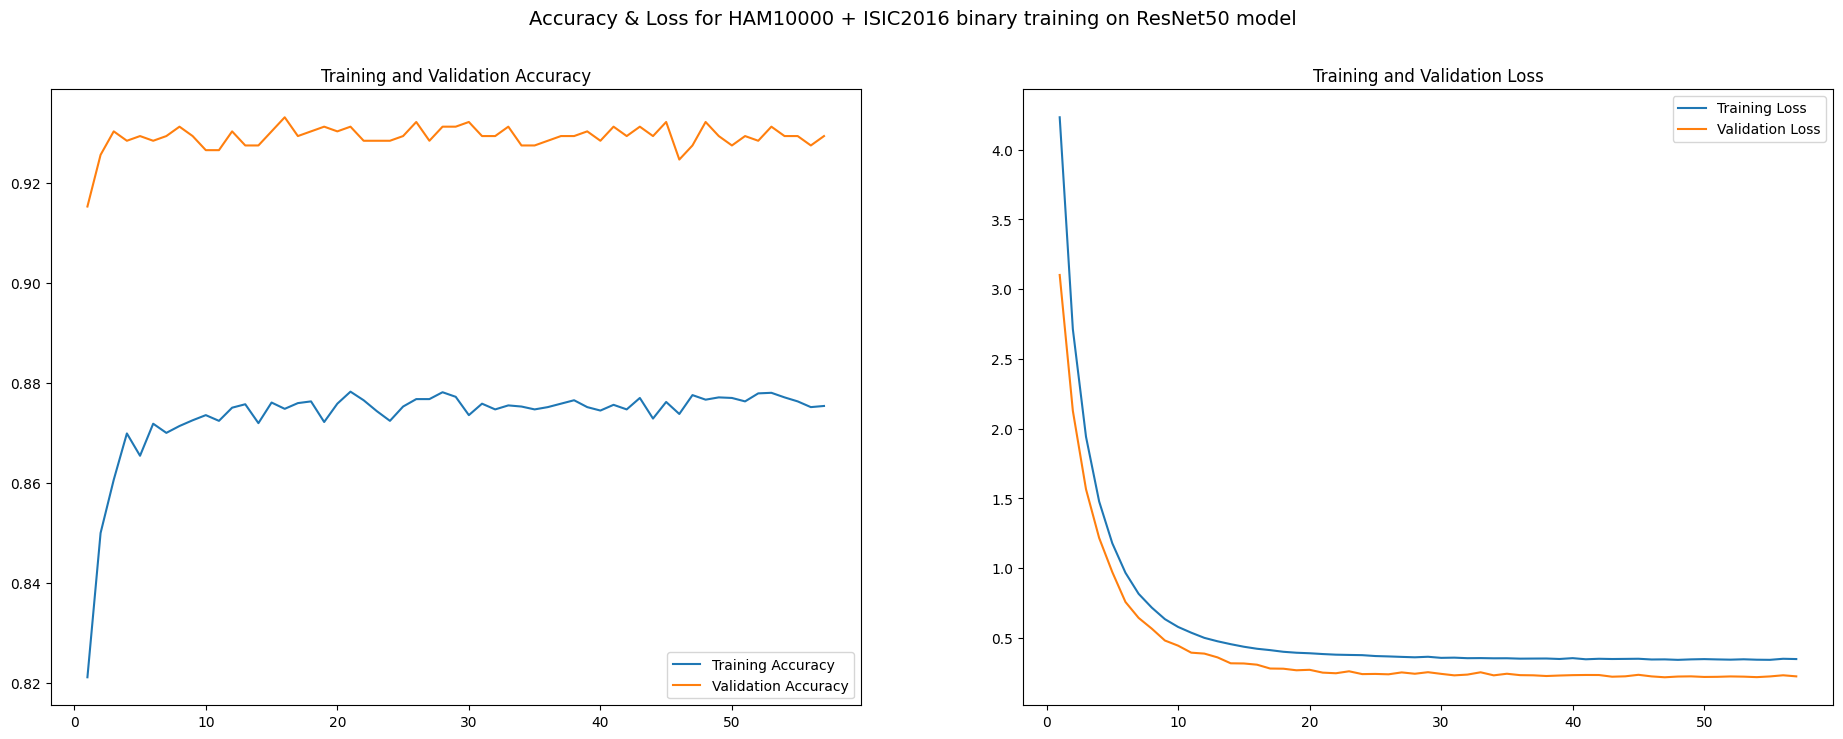

In [10]:
# HAM10000 + ISIC2016 binary training

# Now, let's combine HAM10000 and ISIC2016 DBs
trainimages_combination = {"HAM10000 train images":trainimages_HAM10000, "ISIC2016 train images":trainimages_ISIC2016}
testimages_combination = {"HAM10000 test images":testimages_HAM10000, "ISIC2016 test images":testimages_ISIC2016}
validationimages_combination = {"HAM10000 validation images":validationimages_HAM10000, "ISIC2016 validation images":validationimages_ISIC2016}
trainlabels_combination = {"HAM10000 train labels":trainlabels_binary_HAM10000, "ISIC2016 train labels":trainlabels_binary_ISIC2016}
testlabels_combination = {"HAM10000 test labels":testlabels_binary_HAM10000, "ISIC2016 test labels":testlabels_binary_ISIC2016}
validationlabels_combination = {"HAM10000 validation labels":validationlabels_binary_HAM10000, "ISIC2016 validation labels":validationlabels_binary_ISIC2016}

trainimages_HAM10000_ISIC2016 = utilInstance.combine_images(**trainimages_combination)
testimages_HAM10000_ISIC2016 = utilInstance.combine_images(**testimages_combination)
validationimages_HAM10000_ISIC2016 = utilInstance.combine_images(**validationimages_combination)
trainlabels_binary_HAM10000_ISIC2016 = utilInstance.combine_labels(**trainlabels_combination)
testlabels_binary_HAM10000_ISIC2016 = utilInstance.combine_labels(**testlabels_combination)
validationlabels_binary_HAM10000_ISIC2016 = utilInstance.combine_labels(**validationlabels_combination)


base_model_binary = mel.CNN(trainimages_HAM10000_ISIC2016, trainlabels_binary_HAM10000_ISIC2016, \
    validationimages_HAM10000_ISIC2016, validationlabels_binary_HAM10000_ISIC2016, \
        testimages_HAM10000_ISIC2016, testlabels_binary_HAM10000_ISIC2016, CFG)
ResNet50_name = 'HAM10000 + ISIC2016 binary training on ResNet50'
data_gen_HAM10000_ISIC2016, Resnet50_model = base_model_binary.resnet50(ResNet50_name)

# Install the below beforehand
# pip install pydot
# conda install -c anaconda graphviz
visualizer = mel.Visualizer()
visualizer.visualize_model(model = Resnet50_model, model_name = ResNet50_name)

# Train HAM10000 + ISIC2016
history_HAM10000_ISIC2016_bin = base_model_binary.fit_model(    
    model = Resnet50_model,
    model_name = ResNet50_name,
    trainimages = trainimages_HAM10000_ISIC2016,
    trainlabels = trainlabels_binary_HAM10000_ISIC2016,
    validationimages = validationimages_HAM10000_ISIC2016,
    validationlabels = validationlabels_binary_HAM10000_ISIC2016,
    data_gen = data_gen_HAM10000_ISIC2016
)

visualizer.visualize_performance(
    model_name = ResNet50_name,
    history = history_HAM10000_ISIC2016_bin
)

In [1]:
# HAM10000 + ISIC2016 + ISIC2017 binary training

# Now, let's combine HAM10000, ISIC2016 and ISIC2017
trainimages_combination = {"HAM10000 train images":trainimages_HAM10000, "ISIC2016 train images":trainimages_ISIC2016, "ISIC2017 train images":trainimages_ISIC2017}
testimages_combination = {"HAM10000 test images":testimages_HAM10000, "ISIC2016 test images":testimages_ISIC2016, "ISIC2017 test images":testimages_ISIC2017}
validationimages_combination = {"HAM10000 validation images":validationimages_HAM10000, "ISIC2016 validation images":validationimages_ISIC2016, "ISIC2017 validation images":validationimages_ISIC2017}
trainlabels_combination = {"HAM10000 train labels":trainlabels_binary_HAM10000, "ISIC2016 train labels":trainlabels_binary_ISIC2016, "ISIC2017 train labels":trainlabels_binary_ISIC2017}
testlabels_combination = {"HAM10000 test labels":testlabels_binary_HAM10000, "ISIC2016 test labels":testlabels_binary_ISIC2016, "ISIC2017 test labels":testlabels_binary_ISIC2017}
validationlabels_combination = {"HAM10000 validation labels":validationlabels_binary_HAM10000, "ISIC2016 validation labels":validationlabels_binary_ISIC2016, "ISIC2017 validation labels":validationlabels_binary_ISIC2017}

trainimages_HAM10000_ISIC2016_ISIC2017 = utilInstance.combine_images(**trainimages_combination)
testimages_HAM10000_ISIC2016_ISIC2017 = utilInstance.combine_images(**testimages_combination)
validationimages_HAM10000_ISIC2016_ISIC2017 = utilInstance.combine_images(**validationimages_combination)
trainlabels_binary_HAM10000_ISIC2016_ISIC2017 = utilInstance.combine_labels(**trainlabels_combination)
testlabels_binary_HAM10000_ISIC2016_ISIC2017 = utilInstance.combine_labels(**testlabels_combination)
validationlabels_binary_HAM10000_ISIC2016_ISIC2017 = utilInstance.combine_labels(**validationlabels_combination)


base_model_binary = mel.CNN(trainimages_HAM10000_ISIC2016_ISIC2017, trainlabels_binary_HAM10000_ISIC2016_ISIC2017, \
    validationimages_HAM10000_ISIC2016_ISIC2017, validationlabels_binary_HAM10000_ISIC2016_ISIC2017, \
        testimages_HAM10000_ISIC2016_ISIC2017, testlabels_binary_HAM10000_ISIC2016_ISIC2017, CFG)
ResNet50_name = 'HAM10000 + ISIC2016 + ISIC2017 binary training on ResNet50'
data_gen_HAM10000_ISIC2016_ISIC2017, Resnet50_model = base_model_binary.resnet50(ResNet50_name)

# Install the below beforehand
# pip install pydot
# conda install -c anaconda graphviz
visualizer = mel.Visualizer()
visualizer.visualize_model(model = Resnet50_model, model_name = ResNet50_name)

# Train HAM10000 + ISIC2016 + ISIC2017
history_HAM10000_ISIC2016_ISIC2017_bin = base_model_binary.fit_model(    
    model = Resnet50_model,
    model_name = ResNet50_name,
    trainimages = trainimages_HAM10000_ISIC2016_ISIC2017,
    trainlabels = trainlabels_binary_HAM10000_ISIC2016_ISIC2017,
    validationimages = validationimages_HAM10000_ISIC2016_ISIC2017,
    validationlabels = validationlabels_binary_HAM10000_ISIC2016_ISIC2017,
    data_gen = data_gen_HAM10000_ISIC2016_ISIC2017
)

visualizer.visualize_performance(
    model_name = ResNet50_name,
    history = history_HAM10000_ISIC2016_ISIC2017_bin
)

NameError: name 'trainimages_HAM10000' is not defined

Building ISIC2016 binary training on ResNet50 model...
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dropout_12 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               262272    
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 258       
Total params: 23,850,242
Trainable params: 262,530
Non-trainable params: 23,587,712
_________________________________________________________________
None
Fitting ISIC2016 binary training on ResNet

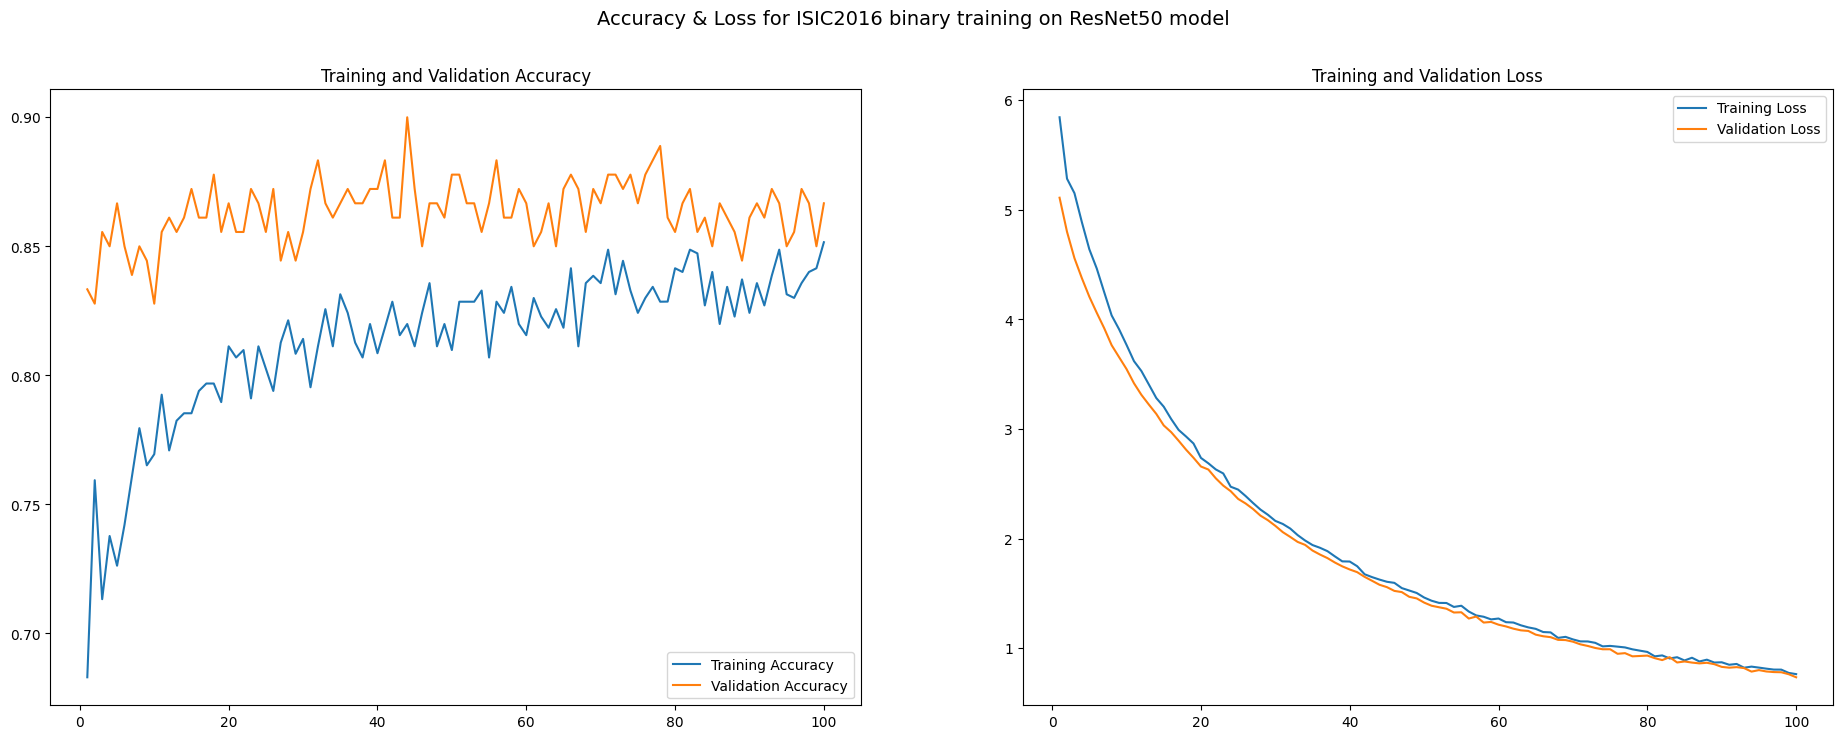

In [12]:
# Solely training ISIC2016

base_model_binary = mel.CNN(trainimages_ISIC2016, trainlabels_binary_ISIC2016, \
    validationimages_ISIC2016, validationlabels_binary_ISIC2016, \
        testimages_ISIC2016, testlabels_binary_ISIC2016, CFG)
ResNet50_name = 'ISIC2016 binary training on ResNet50'
data_gen_ISIC2016, Resnet50_model = base_model_binary.resnet50(ResNet50_name)

# Install the below beforehand
# pip install pydot
# conda install -c anaconda graphviz
visualizer = mel.Visualizer()
visualizer.visualize_model(model = Resnet50_model, model_name = ResNet50_name)

# Train ISIC2016
history_ISIC2016_bin = base_model_binary.fit_model(    
    model = Resnet50_model,
    model_name = ResNet50_name,
    trainimages = trainimages_ISIC2016,
    trainlabels = trainlabels_binary_ISIC2016,
    validationimages = validationimages_ISIC2016,
    validationlabels = validationlabels_binary_ISIC2016,
    data_gen = data_gen_ISIC2016
)

visualizer.visualize_performance(
    model_name = ResNet50_name,
    history = history_ISIC2016_bin
)

/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Building ISIC2017_augmented binary training on ResNet50 model...
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dropout_8 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               262272    
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 258       
Total params: 23,850,242
Trainable params: 262,530
Non-trainable params: 23,587,712
_________________________________________________________________
None
Fitting ISIC2017_augmented binar

/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/100
121/121 [==============================] - 2s 18ms/step - loss: 2.9321 - accuracy: 0.6048 - val_loss: 2.2970 - val_accuracy: 0.8000
Epoch 3/100
121/121 [==============================] - 2s 18ms/step - loss: 2.0340 - accuracy: 0.6418 - val_loss: 1.6705 - val_accuracy: 0.8000
Epoch 4/100
121/121 [==============================] - 2s 20ms/step - loss: 1.5566 - accuracy: 0.6465 - val_loss: 1.3240 - val_accuracy: 0.8000
Epoch 5/100
121/121 [==============================] - 2s 18ms/step - loss: 1.2787 - accuracy: 0.6544 - val_loss: 1.1343 - val_accuracy: 0.8000
Epoch 6/100
121/121 [==============================] - 2s 18ms/step - loss: 1.1201 - accuracy: 0.6561 - val_loss: 1.0221 - val_accuracy: 0.8000
Epoch 7/100
121/121 [==============================] - 2s 18ms/step - loss: 1.0219 - accuracy: 0.6688 - val_loss: 0.9521 - val_accuracy: 0.7867
Epoch 8/100
121/121 [==============================] - 2s 18ms/step - loss: 0.9737 - accuracy: 0.6558 - val_loss: 0.9030 - val_accuracy:

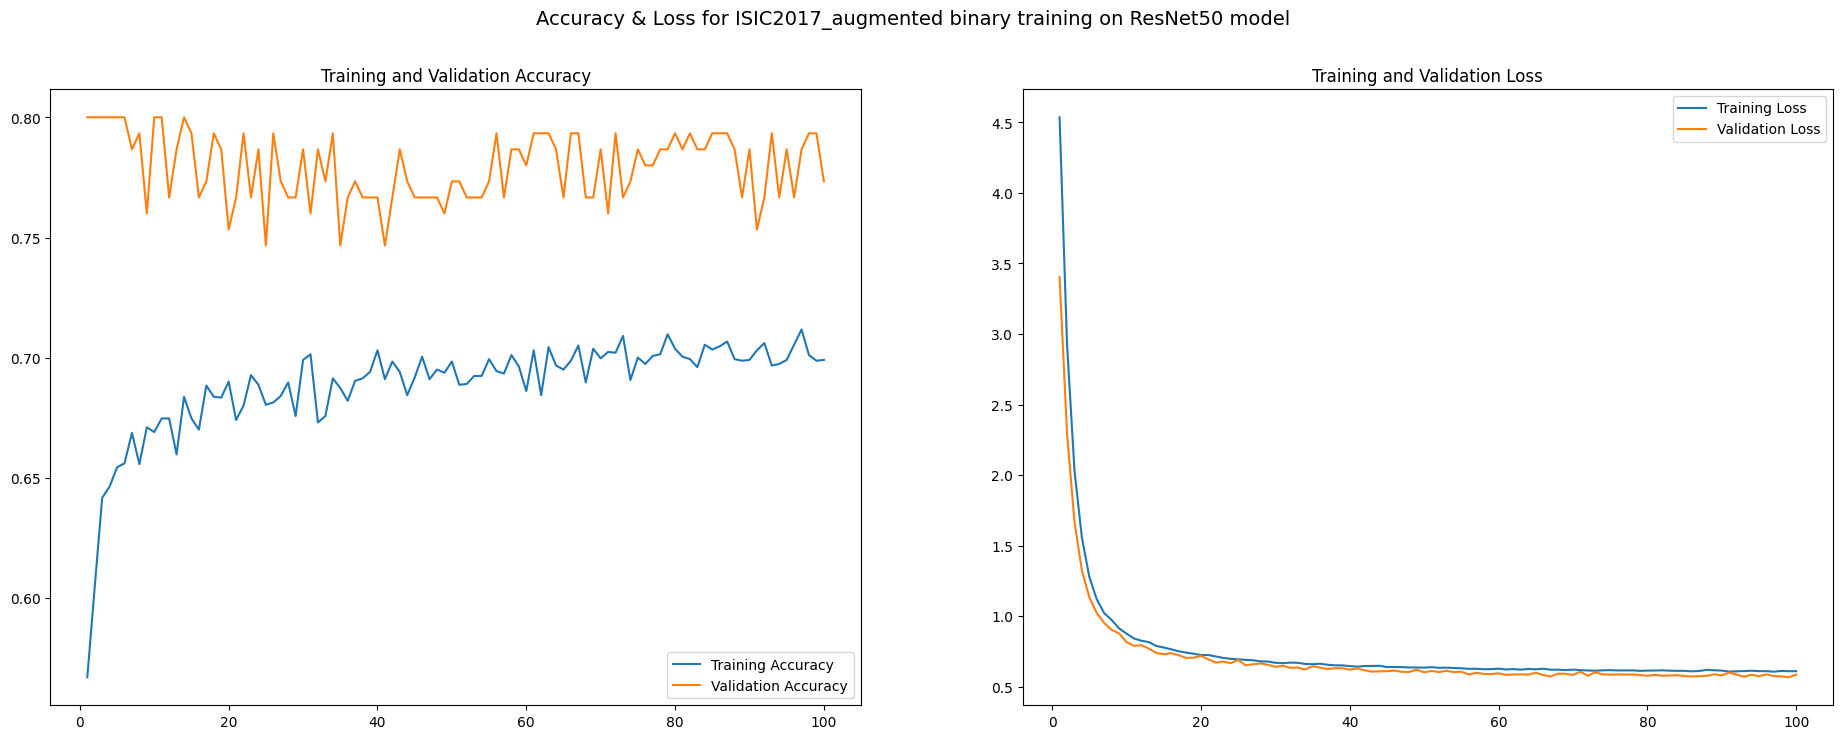

In [14]:
# Solely training ISIC2017 augmented
dbpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/melanomaDB/customDB'

trainpixels_ISIC2017_augmented, testpixels_ISIC2017, validationpixels_ISIC2017, \
			trainlabels_binary_ISIC2017_augmented, testlabels_binary_ISIC2017, validationlabels_binary_ISIC2017, means_ISIC2017_aug, stds_ISIC2017_aug, num_classes_binary_ISIC2017_aug\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2017_augmentedWith_700Melanoma_326Non-Melanoma_112h_150w_binary.pkl')


trainimages_ISIC2017_augmented, validationimages_ISIC2017, testimages_ISIC2017 = utilInstance.normalizeImagesWithCustomMeanStd(trainpixels_ISIC2017_augmented, validationpixels_ISIC2017, testpixels_ISIC2017, means_ISIC2017_aug, stds_ISIC2017_aug)
assert trainimages_ISIC2017_augmented.shape[0] == trainlabels_binary_ISIC2017_augmented.shape[0]
assert validationimages_ISIC2017.shape[0] == validationlabels_binary_ISIC2017.shape[0]
assert testimages_ISIC2017.shape[0] == testlabels_binary_ISIC2017.shape[0]

base_model_binary = mel.CNN(trainimages_ISIC2017_augmented, trainlabels_binary_ISIC2017_augmented, \
    validationimages_ISIC2017, validationlabels_binary_ISIC2017, \
        testimages_ISIC2017, testlabels_binary_ISIC2017, CFG)

ResNet50_name = 'ISIC2017_augmented binary training on ResNet50'
data_gen_ISIC2017_aug, Resnet50_model = base_model_binary.resnet50(ResNet50_name)

# Install the below beforehand
# pip install pydot
# conda install -c anaconda graphviz
visualizer = mel.Visualizer()
visualizer.visualize_model(model = Resnet50_model, model_name = ResNet50_name)

# Train ISIC2017
history_ISIC2017_aug_bin = base_model_binary.fit_model(    
    model = Resnet50_model,
    model_name = ResNet50_name,
    trainimages = trainimages_ISIC2017_augmented,
    trainlabels = trainlabels_binary_ISIC2017_augmented,
    validationimages = validationimages_ISIC2017,
    validationlabels = validationlabels_binary_ISIC2017,
    data_gen = data_gen_ISIC2017_aug
)

visualizer.visualize_performance(
    model_name = ResNet50_name,
    history = history_ISIC2017_aug_bin
)

In [15]:
# Testing ISIC2017 augmented trained model

from keras.models import load_model
# modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/'
filename = 'ISIC2017_augmented binary training on ResNet50.hdf5'
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename
# saved_model = load_model(modelpath)

# Test on HAM10000 test set
trainpixels_HAM10000, testpixels_HAM10000, validationpixels_HAM10000, \
			trainlabels_binary_HAM10000, testlabels_binary_HAM10000, validationlabels_binary_HAM10000, _, _, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'HAM10000_{img_size[0]}h_{img_size[1]}w_binary.pkl')

trainimages_HAM10000, validationimages_HAM10000, testimages_HAM10000 = \
    utilInstance.normalizeImagesWithCustomMeanStd(\
        trainpixels_HAM10000, validationpixels_HAM10000, testpixels_HAM10000, \
            means_ISIC2017_aug, stds_ISIC2017_aug)


print("Testing on HAM10000")
Resnet50_model, test_loss, ResNet50_test_acc = base_model_binary.evaluate_model(
    model_name = 'HAM10000 augmented testing on HAM10000 trained with ResNet50',
    model_path = modelpath,
    trainimages = trainimages_HAM10000,
    trainlabels = trainlabels_binary_HAM10000,
    validationimages = validationimages_HAM10000,
    validationlabels = validationlabels_binary_HAM10000,
    testimages = testimages_HAM10000,
    testlabels = testlabels_binary_HAM10000
)


# Test on ISIC 2016 test set
trainpixels_ISIC2016, testpixels_ISIC2016, validationpixels_ISIC2016, \
			trainlabels_binary_ISIC2016, testlabels_binary_ISIC2016, validationlabels_binary_ISIC2016, _, _, num_classes_binary_ISIC2016\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2016_{img_size[0]}h_{img_size[1]}w_binary.pkl')

trainimages_ISIC2016, validationimages_ISIC2016, testimages_ISIC2016 = \
    utilInstance.normalizeImagesWithCustomMeanStd(\
        trainpixels_ISIC2016, validationpixels_ISIC2016, testpixels_ISIC2016, \
            means_ISIC2017_aug, stds_ISIC2017_aug)



print("Testing on ISIC2016")
Resnet50_model, test_loss, ResNet50_test_acc = base_model_binary.evaluate_model(
    model_name = 'HAM10000 augmented testing on ISIC2016 trained with ResNet50',
    model_path = modelpath,
    trainimages = trainimages_ISIC2016,
    trainlabels = trainlabels_binary_ISIC2016,
    validationimages = validationimages_ISIC2016,
    validationlabels = validationlabels_binary_ISIC2016,
    testimages = testimages_ISIC2016,
    testlabels = testlabels_binary_ISIC2016
)

# Test on ISIC 2017 test set
trainpixels_ISIC2017, testpixels_ISIC2017, validationpixels_ISIC2017, \
			trainlabels_binary_ISIC2017, testlabels_binary_ISIC2017, validationlabels_binary_ISIC2017, _, _, num_classes_binary_ISIC2017\
                 = utilInstance.loadDatasetFromFile(dbpath+'/'+f'ISIC2017_{img_size[0]}h_{img_size[1]}w_binary.pkl')

trainimages_ISIC2017, validationimages_ISIC2017, testimages_ISIC2017 = \
    utilInstance.normalizeImagesWithCustomMeanStd(\
        trainpixels_ISIC2017, validationpixels_ISIC2017, testpixels_ISIC2017, \
            means_ISIC2017_aug, stds_ISIC2017_aug)

# Test on ISIC2017 test set
print("Testing on ISIC2017")
Resnet50_model, test_loss, ResNet50_test_acc = base_model_binary.evaluate_model(
    model_name = 'HAM10000 augmented testing on ISIC2017 trained with ResNet50',
    model_path = modelpath,
    trainimages = trainimages_ISIC2017,
    trainlabels = trainlabels_binary_ISIC2017,
    validationimages = validationimages_ISIC2017,
    validationlabels = validationlabels_binary_ISIC2017,
    testimages = testimages_ISIC2017,
    testlabels = testlabels_binary_ISIC2017
)


Testing on HAM10000
Evaluating HAM10000 augmented testing on HAM10000 trained with ResNet50 model...

251/251 [==============================] - 5s 16ms/step - loss: 0.4900 - accuracy: 0.8700
Train loss = 0.49001428484916687  ;  Train accuracy = 87.00%

28/28 [==============================] - 0s 16ms/step - loss: 0.4180 - accuracy: 0.9422
Validation loss = 0.4179859757423401  ;  Validation accuracy = 94.22%

35/35 [==============================] - 1s 16ms/step - loss: 0.3943 - accuracy: 0.9592
Test loss = 0.3943374752998352  ;  Test accuracy = 95.92%
Testing on ISIC2016
Evaluating HAM10000 augmented testing on ISIC2016 trained with ResNet50 model...

23/23 [==============================] - 1s 16ms/step - loss: 0.5260 - accuracy: 0.8081
Train loss = 0.5260010361671448  ;  Train accuracy = 80.81%

6/6 [==============================] - 0s 16ms/step - loss: 0.4733 - accuracy: 0.8444
Validation loss = 0.4733295738697052  ;  Validation accuracy = 84.44%

12/12 [==========================

Input 0: ISIC2016 train images
Input 1: ISIC2017 train images
Combined images: ISIC2016 train images AND ISIC2017 train images AND 
Input 0: ISIC2016 test images
Input 1: ISIC2017 test images
Combined images: ISIC2016 test images AND ISIC2017 test images AND 
Input 0: ISIC2016 validation images
Input 1: ISIC2017 validation images
Combined images: ISIC2016 validation images AND ISIC2017 validation images AND 
Input: 0: ISIC2016 train labels
Input: 1: ISIC2017 train labels
Combined labels: ISIC2016 train labels AND ISIC2017 train labels AND 
Input: 0: ISIC2016 test labels
Input: 1: ISIC2017 test labels
Combined labels: ISIC2016 test labels AND ISIC2017 test labels AND 
Input: 0: ISIC2016 validation labels
Input: 1: ISIC2017 validation labels
Combined labels: ISIC2016 validation labels AND ISIC2017 validation labels AND 
Building ISIC2016 + ISIC2017 binary training on ResNet50 model...
Model: "sequential_8"
_________________________________________________________________
Layer (type)    

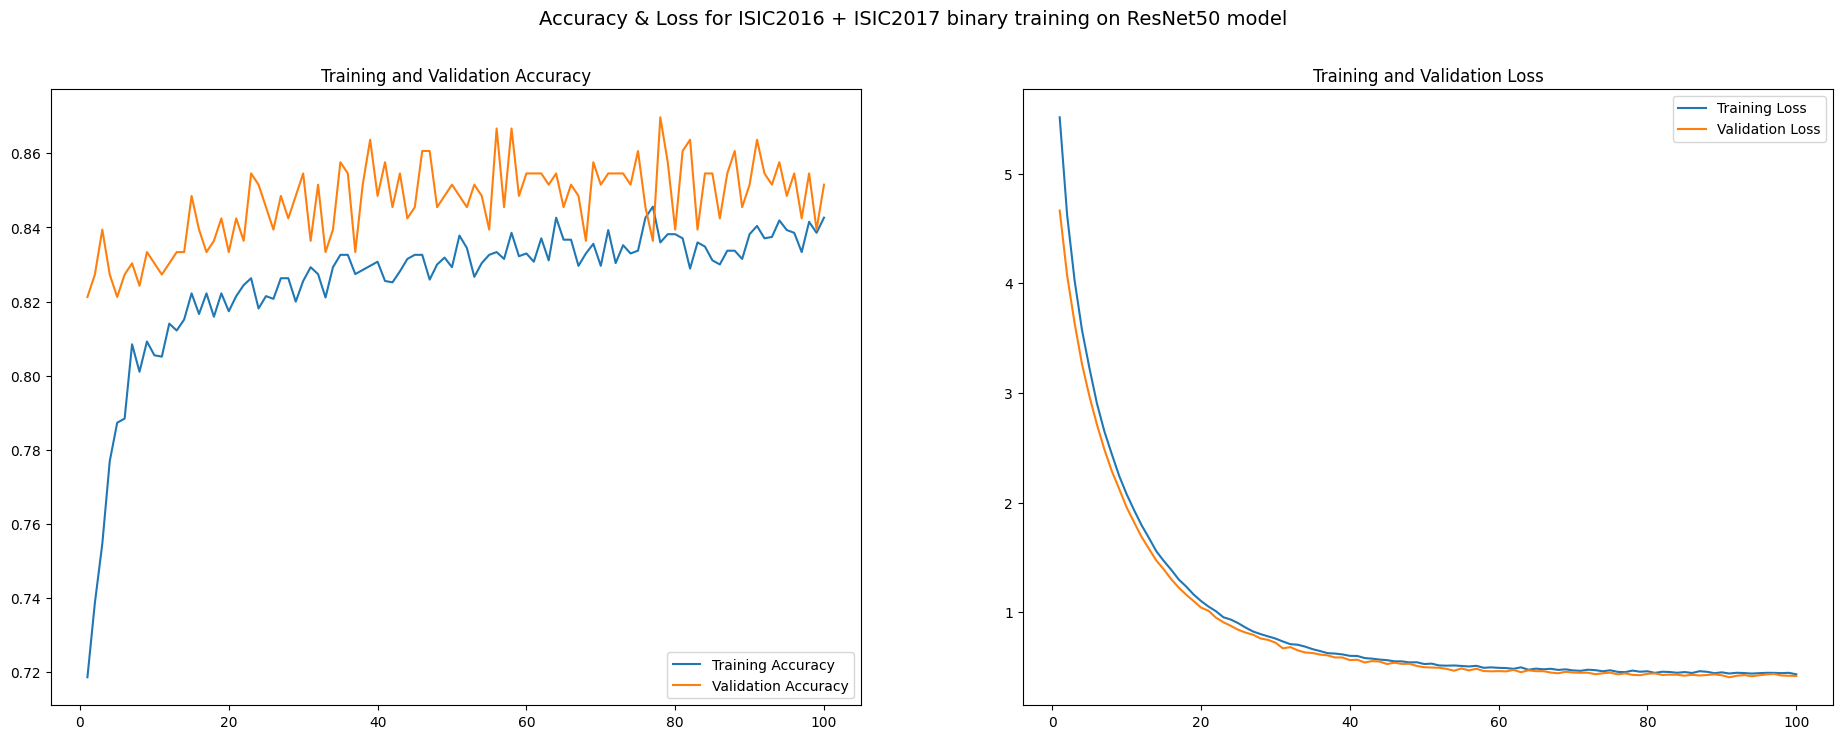

In [14]:
# ISIC2016 + ISIC2017 binary training

# Now, let's combine ISIC2016 AND ISIC2017 DBs
trainimages_combination = {"ISIC2016 train images":trainimages_ISIC2016, "ISIC2017 train images":trainimages_ISIC2017}
testimages_combination = {"ISIC2016 test images":testimages_ISIC2016, "ISIC2017 test images":testimages_ISIC2017}
validationimages_combination = {"ISIC2016 validation images":validationimages_ISIC2016, "ISIC2017 validation images":validationimages_ISIC2017}
trainlabels_combination = {"ISIC2016 train labels":trainlabels_binary_ISIC2016, "ISIC2017 train labels":trainlabels_binary_ISIC2017}
testlabels_combination = {"ISIC2016 test labels":testlabels_binary_ISIC2016, "ISIC2017 test labels":testlabels_binary_ISIC2017}
validationlabels_combination = {"ISIC2016 validation labels":validationlabels_binary_ISIC2016, "ISIC2017 validation labels":validationlabels_binary_ISIC2017}

trainimages_ISIC2016_ISIC2017 = utilInstance.combine_images(**trainimages_combination)
testimages_ISIC2016_ISIC2017 = utilInstance.combine_images(**testimages_combination)
validationimages_ISIC2016_ISIC2017 = utilInstance.combine_images(**validationimages_combination)
trainlabels_binary_ISIC2016_ISIC2017 = utilInstance.combine_labels(**trainlabels_combination)
testlabels_binary_ISIC2016_ISIC2017 = utilInstance.combine_labels(**testlabels_combination)
validationlabels_binary_ISIC2016_ISIC2017 = utilInstance.combine_labels(**validationlabels_combination)


base_model_binary = mel.CNN(trainimages_ISIC2016_ISIC2017, trainlabels_binary_ISIC2016_ISIC2017, \
    validationimages_ISIC2016_ISIC2017, validationlabels_binary_ISIC2016_ISIC2017, \
        testimages_ISIC2016_ISIC2017, testlabels_binary_ISIC2016_ISIC2017, CFG)
ResNet50_name = 'ISIC2016 + ISIC2017 binary training on ResNet50'
data_gen_ISIC2016_ISIC2017, Resnet50_model = base_model_binary.resnet50(ResNet50_name)

# Install the below beforehand
# pip install pydot
# conda install -c anaconda graphviz
visualizer = mel.Visualizer()
visualizer.visualize_model(model = Resnet50_model, model_name = ResNet50_name)

# Train ISIC2016 + ISIC2017
history_ISIC2016_ISIC2017_bin = base_model_binary.fit_model(    
    model = Resnet50_model,
    model_name = ResNet50_name,
    trainimages = trainimages_ISIC2016_ISIC2017,
    trainlabels = trainlabels_binary_ISIC2016_ISIC2017,
    validationimages = validationimages_ISIC2016_ISIC2017,
    validationlabels = validationlabels_binary_ISIC2016_ISIC2017,
    data_gen = data_gen_ISIC2016_ISIC2017
)

visualizer.visualize_performance(
    model_name = ResNet50_name,
    history = history_ISIC2016_ISIC2017_bin
)

In [15]:
# Testing ISIC2016 trained model

from keras.models import load_model
# modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/'
filename = 'ISIC2016 binary training on ResNet50.hdf5'
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename
# saved_model = load_model(modelpath)


# Test set should be using only ISIC2016 or ISIC2017 test sets
# Test on ISIC 2016 test set
Resnet50_model, test_loss, ResNet50_test_acc = base_model_binary.evaluate_model(
    model_name = 'ISIC2016 binary ResNet50',
    model_path = modelpath,
    trainimages = trainimages_ISIC2016,
    trainlabels = trainlabels_binary_ISIC2016,
    validationimages = validationimages_ISIC2016,
    validationlabels = validationlabels_binary_ISIC2016,
    testimages = testimages_ISIC2016,
    testlabels = testlabels_binary_ISIC2016
)

# Test on ISIC2017 test set
Resnet50_model, test_loss, ResNet50_test_acc = base_model_binary.evaluate_model(
    model_name = 'ISIC2016 binary ResNet50',
    model_path = modelpath,
    trainimages = trainimages_ISIC2017,
    trainlabels = trainlabels_binary_ISIC2017,
    validationimages = validationimages_ISIC2017,
    validationlabels = validationlabels_binary_ISIC2017,
    testimages = testimages_ISIC2017,
    testlabels = testlabels_binary_ISIC2017
)


Evaluating ISIC2016 binary ResNet50 model...

23/23 [==============================] - 1s 17ms/step - loss: 0.7353 - accuracy: 0.8512
Train loss = 0.7352609634399414  ;  Train accuracy = 85.12%

6/6 [==============================] - 0s 16ms/step - loss: 0.7314 - accuracy: 0.8833
Validation loss = 0.7314244508743286  ;  Validation accuracy = 88.33%

12/12 [==============================] - 0s 16ms/step - loss: 0.8000 - accuracy: 0.8175
Test loss = 0.7999572157859802  ;  Test accuracy = 81.75%
Evaluating ISIC2016 binary ResNet50 model...

63/63 [==============================] - 2s 16ms/step - loss: 0.8293 - accuracy: 0.8350
Train loss = 0.8293459415435791  ;  Train accuracy = 83.50%

5/5 [==============================] - 0s 16ms/step - loss: 0.8709 - accuracy: 0.8200
Validation loss = 0.8709109425544739  ;  Validation accuracy = 82.00%

19/19 [==============================] - 0s 16ms/step - loss: 0.9870 - accuracy: 0.8000
Test loss = 0.9870314598083496  ;  Test accuracy = 80.00%


In [16]:
# Testing ISIC2017 trained model

from keras.models import load_model
# modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/'
filename = 'ISIC2017 binary training on ResNet50.hdf5'
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename
# saved_model = load_model(modelpath)


# Test set should be using only ISIC2016 or ISIC2017 test sets
# Test on ISIC 2016 test set
Resnet50_model, test_loss, ResNet50_test_acc = base_model_binary.evaluate_model(
    model_name = 'ISIC2017 binary ResNet50',
    model_path = modelpath,
    trainimages = trainimages_ISIC2016,
    trainlabels = trainlabels_binary_ISIC2016,
    validationimages = validationimages_ISIC2016,
    validationlabels = validationlabels_binary_ISIC2016,
    testimages = testimages_ISIC2016,
    testlabels = testlabels_binary_ISIC2016
)

# Test on ISIC2017 test set
Resnet50_model, test_loss, ResNet50_test_acc = base_model_binary.evaluate_model(
    model_name = 'ISIC2017 binary ResNet50',
    model_path = modelpath,
    trainimages = trainimages_ISIC2017,
    trainlabels = trainlabels_binary_ISIC2017,
    validationimages = validationimages_ISIC2017,
    validationlabels = validationlabels_binary_ISIC2017,
    testimages = testimages_ISIC2017,
    testlabels = testlabels_binary_ISIC2017
)


Evaluating ISIC2017 binary ResNet50 model...

23/23 [==============================] - 1s 16ms/step - loss: 0.4431 - accuracy: 0.8345
Train loss = 0.44306620955467224  ;  Train accuracy = 83.45%

6/6 [==============================] - 0s 16ms/step - loss: 0.3835 - accuracy: 0.8722
Validation loss = 0.383525013923645  ;  Validation accuracy = 87.22%

12/12 [==============================] - 0s 16ms/step - loss: 0.4462 - accuracy: 0.8386
Test loss = 0.4461909830570221  ;  Test accuracy = 83.86%
Evaluating ISIC2017 binary ResNet50 model...

63/63 [==============================] - 2s 16ms/step - loss: 0.4334 - accuracy: 0.8400
Train loss = 0.43337729573249817  ;  Train accuracy = 84.00%

5/5 [==============================] - 0s 16ms/step - loss: 0.4942 - accuracy: 0.8333
Validation loss = 0.4941977858543396  ;  Validation accuracy = 83.33%

19/19 [==============================] - 0s 16ms/step - loss: 0.5254 - accuracy: 0.8250
Test loss = 0.5253562331199646  ;  Test accuracy = 82.50%


In [17]:
# Testing ISIC2016 + ISIC2017 trained model

from keras.models import load_model
# modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/'
filename = 'ISIC2016 + ISIC2017 binary training on ResNet50.hdf5'
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename
# saved_model = load_model(modelpath)


# Test set should be using only ISIC2016 or ISIC2017 test sets
# Test on ISIC 2016 test set
Resnet50_model, test_loss, ResNet50_test_acc = base_model_binary.evaluate_model(
    model_name = 'ISIC2016 + ISIC2017 binary ResNet50',
    model_path = modelpath,
    trainimages = trainimages_ISIC2016,
    trainlabels = trainlabels_binary_ISIC2016,
    validationimages = validationimages_ISIC2016,
    validationlabels = validationlabels_binary_ISIC2016,
    testimages = testimages_ISIC2016,
    testlabels = testlabels_binary_ISIC2016
)

# Test on ISIC2017 test set
Resnet50_model, test_loss, ResNet50_test_acc = base_model_binary.evaluate_model(
    model_name = 'ISIC2016 + ISIC2017 binary ResNet50',
    model_path = modelpath,
    trainimages = trainimages_ISIC2017,
    trainlabels = trainlabels_binary_ISIC2017,
    validationimages = validationimages_ISIC2017,
    validationlabels = validationlabels_binary_ISIC2017,
    testimages = testimages_ISIC2017,
    testlabels = testlabels_binary_ISIC2017
)


Evaluating ISIC2016 + ISIC2017 binary ResNet50 model...

23/23 [==============================] - 1s 16ms/step - loss: 0.4091 - accuracy: 0.8442
Train loss = 0.4090694189071655  ;  Train accuracy = 84.42%

6/6 [==============================] - 0s 16ms/step - loss: 0.3567 - accuracy: 0.8833
Validation loss = 0.35669559240341187  ;  Validation accuracy = 88.33%

12/12 [==============================] - 0s 16ms/step - loss: 0.4339 - accuracy: 0.8413
Test loss = 0.43391790986061096  ;  Test accuracy = 84.13%
Evaluating ISIC2016 + ISIC2017 binary ResNet50 model...



63/63 [==============================] - 2s 16ms/step - loss: 0.4267 - accuracy: 0.8410
Train loss = 0.426738440990448  ;  Train accuracy = 84.10%

5/5 [==============================] - 0s 16ms/step - loss: 0.4902 - accuracy: 0.8267
Validation loss = 0.490217387676239  ;  Validation accuracy = 82.67%

19/19 [==============================] - 0s 16ms/step - loss: 0.5428 - accuracy: 0.8100
Test loss = 0.5427539944648743  ;  Test accuracy = 81.00%


Evaluating HAM10000 binary ResNet50 model...

23/23 [==============================] - 1s 16ms/step - loss: 0.5170 - accuracy: 0.8220
Train loss = 0.5170233249664307  ;  Train accuracy = 82.20%

6/6 [==============================] - 0s 16ms/step - loss: 0.4426 - accuracy: 0.8333
Validation loss = 0.4426238536834717  ;  Validation accuracy = 83.33%

12/12 [==============================] - 0s 16ms/step - loss: 0.4823 - accuracy: 0.8201
Test loss = 0.4823231101036072  ;  Test accuracy = 82.01%
Evaluating HAM10000 binary ResNet50 model...

63/63 [==============================] - 2s 16ms/step - loss: 0.5158 - accuracy: 0.8220
Train loss = 0.5158482193946838  ;  Train accuracy = 82.20%

5/5 [==============================] - 0s 16ms/step - loss: 0.5673 - accuracy: 0.8067
Validation loss = 0.5672637224197388  ;  Validation accuracy = 80.67%

19/19 [==============================] - 0s 16ms/step - loss: 0.5735 - accuracy: 0.8033
Test loss = 0.5734913945198059  ;  Test accuracy = 80.33%


In [19]:
# Testing HAM10000 + ISIC2016 trained model

from keras.models import load_model
# modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/'
filename = 'HAM10000 + ISIC2016 binary training on ResNet50.hdf5'
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename
# saved_model = load_model(modelpath)


# Test set should be using only ISIC2016 or ISIC2017 test sets
# Test on ISIC2016 test set
Resnet50_model, test_loss, ResNet50_test_acc = base_model_binary.evaluate_model(
    model_name = 'HAM10000 + ISIC2016 binary ResNet50',
    model_path = modelpath,
    trainimages = trainimages_ISIC2016,
    trainlabels = trainlabels_binary_ISIC2016,
    validationimages = validationimages_ISIC2016,
    validationlabels = validationlabels_binary_ISIC2016,
    testimages = testimages_ISIC2016,
    testlabels = testlabels_binary_ISIC2016
)

# Test on ISIC2017 test set
Resnet50_model, test_loss, ResNet50_test_acc = base_model_binary.evaluate_model(
    model_name = 'HAM10000 + ISIC2016 binary ResNet50',
    model_path = modelpath,
    trainimages = trainimages_ISIC2017,
    trainlabels = trainlabels_binary_ISIC2017,
    validationimages = validationimages_ISIC2017,
    validationlabels = validationlabels_binary_ISIC2017,
    testimages = testimages_ISIC2017,
    testlabels = testlabels_binary_ISIC2017
)


Evaluating HAM10000 + ISIC2016 binary ResNet50 model...

23/23 [==============================] - 1s 24ms/step - loss: 0.4794 - accuracy: 0.8206
Train loss = 0.47944995760917664  ;  Train accuracy = 82.06%

6/6 [==============================] - 0s 16ms/step - loss: 0.4116 - accuracy: 0.8500
Validation loss = 0.41163215041160583  ;  Validation accuracy = 85.00%

12/12 [==============================] - 0s 16ms/step - loss: 0.4653 - accuracy: 0.8201
Test loss = 0.46531856060028076  ;  Test accuracy = 82.01%
Evaluating HAM10000 + ISIC2016 binary ResNet50 model...

63/63 [==============================] - 2s 16ms/step - loss: 0.4984 - accuracy: 0.8235
Train loss = 0.49837726354599  ;  Train accuracy = 82.35%

5/5 [==============================] - 0s 16ms/step - loss: 0.5448 - accuracy: 0.8067
Validation loss = 0.5448094010353088  ;  Validation accuracy = 80.67%

19/19 [==============================] - 0s 16ms/step - loss: 0.5790 - accuracy: 0.8050
Test loss = 0.5789622664451599  ;  Test

In [35]:
# Testing HAM10000 + ISIC2016 + ISIC2017 trained model

from keras.models import load_model
# modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/'
filename = 'HAM10000 + ISIC2016 + ISIC2017 binary training on ResNet50.hdf5'
modelpath = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot/' + filename
# saved_model = load_model(modelpath)


# Test set should be using only ISIC2016 or ISIC2017 test sets
# Test on ISIC2016 test set
Resnet50_model, test_loss, ResNet50_test_acc = base_model_binary.evaluate_model(
    model_name = 'HAM10000 + ISIC2016 + ISIC2017 binary ResNet50',
    model_path = modelpath,
    trainimages = trainimages_ISIC2016,
    trainlabels = trainlabels_binary_ISIC2016,
    validationimages = validationimages_ISIC2016,
    validationlabels = validationlabels_binary_ISIC2016,
    testimages = testimages_ISIC2016,
    testlabels = testlabels_binary_ISIC2016
)

# Test on ISIC2017 test set
Resnet50_model, test_loss, ResNet50_test_acc = base_model_binary.evaluate_model(
    model_name = 'HAM10000 + ISIC2016 + ISIC2017 binary ResNet50',
    model_path = modelpath,
    trainimages = trainimages_ISIC2017,
    trainlabels = trainlabels_binary_ISIC2017,
    validationimages = validationimages_ISIC2017,
    validationlabels = validationlabels_binary_ISIC2017,
    testimages = testimages_ISIC2017,
    testlabels = testlabels_binary_ISIC2017
)


Evaluating HAM10000 + ISIC2016 + ISIC2017 binary ResNet50 model...

23/23 [==============================] - 1s 16ms/step - loss: 0.4700 - accuracy: 0.8164
Train loss = 0.4700008034706116  ;  Train accuracy = 81.64%

6/6 [==============================] - 0s 16ms/step - loss: 0.3974 - accuracy: 0.8556
Validation loss = 0.397428035736084  ;  Validation accuracy = 85.56%

12/12 [==============================] - 0s 16ms/step - loss: 0.4531 - accuracy: 0.8122
Test loss = 0.4530995786190033  ;  Test accuracy = 81.22%
Evaluating HAM10000 + ISIC2016 + ISIC2017 binary ResNet50 model...

63/63 [==============================] - 2s 16ms/step - loss: 0.4734 - accuracy: 0.8210
Train loss = 0.4733904004096985  ;  Train accuracy = 82.10%

5/5 [==============================] - 0s 16ms/step - loss: 0.5159 - accuracy: 0.8000
Validation loss = 0.5158708095550537  ;  Validation accuracy = 80.00%

19/19 [==============================] - 0s 16ms/step - loss: 0.5464 - accuracy: 0.8050
Test loss = 0.54644

In [58]:
from tensorflow.keras.applications.resnet50 import ResNet50
resnet50_out = ResNet50(
            include_top=False,
            # include_top=True,
            input_shape=(CFG['img_height'], CFG['img_width'], 3),
            # input_shape=(64, 64, 3),
            pooling = 'avg',
            weights='imagenet'
        )

model = mel.Model(trainimages_ISIC2017, trainlabels_binary_ISIC2017, \
    validationimages_ISIC2017, validationlabels_binary_ISIC2017, \
        testimages_ISIC2017, testlabels_binary_ISIC2017, CFG)

from tensorflow.keras.optimizers import Adam, SGD, RMSprop

Resnet50_model = model.build_model(
    base_model = resnet50_out,
    base_model_name = 'Completely random model',
    model_optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6, amsgrad=False)
)



# Testing completely random model

test_loss, test_acc = Resnet50_model.evaluate(testimages_ISIC2016, testlabels_binary_ISIC2016, verbose = 1)
test_loss, test_acc = Resnet50_model.evaluate(testimages_ISIC2017, testlabels_binary_ISIC2017, verbose = 1)



# This is HAM10000 + ISIC2016 + ISIC2017

Resnet50_model.load_weights(modelpath)



test_loss, test_acc = Resnet50_model.evaluate(testimages_ISIC2016, testlabels_binary_ISIC2016, verbose = 1)
test_loss, test_acc = Resnet50_model.evaluate(testimages_ISIC2017, testlabels_binary_ISIC2017, verbose = 1)

Building Completely random model model...
19/19 [==============================] - 0s 16ms/step - loss: 0.5464 - accuracy: 0.8050
